In [ ]:
file_path = 'deprem.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data.head()


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,mb
0,1.970000e+13,19.08.1966,12:03:55 ÖÖ,39.21,41.40,turkey,Mus,tasci_varto,east,0.1,14.0,5.0,4.7,4.7,5.0,4.7
1,1.970000e+13,19.08.1966,12:41:18 ÖÖ,39.13,41.48,turkey,Mus,yedikavak_varto,south_west,0.2,50.0,5.0,4.7,4.7,5.0,4.7
2,1.970000e+13,30.12.1966,12:57:09 ÖÖ,40.74,30.74,turkey,Sakarya,suleymaniye_hendek,south_west,0.2,31.0,4.5,4.3,4.3,4.5,4.2
3,1.970000e+13,22.05.1967,12:46:02 ÖÖ,36.59,29.35,turkey,Mugla,cobanlar_fethiye,south_west,0.2,54.0,4.9,4.7,4.6,4.9,4.6
4,1.970000e+13,26.01.1974,12:49:20 ÖÖ,37.25,29.60,turkey,Burdur,kucukalan_cavdir,south_east,0.2,34.0,4.2,4.0,4.0,4.2,4.1


In [ ]:

data['time'] = data['time'].str.replace('ÖÖ', 'AM').str.replace('ÖS', 'PM')


data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], dayfirst=True)

data_cleaned = data.drop(columns=['id', 'date', 'time', 'dist', 'direction'])


missing_values = data_cleaned.isnull().sum()

data_cleaned.head(), missing_values


<ipython-input-18-3a622ff664c0>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], dayfirst=True)


(     lat   long country     city                area  depth   xm   md  \
 0  39.21  41.40  turkey      Mus         tasci_varto   14.0  5.0  4.7   
 1  39.13  41.48  turkey      Mus     yedikavak_varto   50.0  5.0  4.7   
 2  40.74  30.74  turkey  Sakarya  suleymaniye_hendek   31.0  4.5  4.3   
 3  36.59  29.35  turkey    Mugla    cobanlar_fethiye   54.0  4.9  4.7   
 4  37.25  29.60  turkey   Burdur    kucukalan_cavdir   34.0  4.2  4.0   
 
    richter   mw   mb            datetime  
 0      4.7  5.0  4.7 1966-08-19 00:03:55  
 1      4.7  5.0  4.7 1966-08-19 00:41:18  
 2      4.3  4.5  4.2 1966-12-30 00:57:09  
 3      4.6  4.9  4.6 1967-05-22 00:46:02  
 4      4.0  4.2  4.1 1974-01-26 00:49:20  ,
 lat         0
 long        0
 country     0
 city        0
 area        5
 depth       0
 xm          0
 md          0
 richter     0
 mw          0
 mb          0
 datetime    0
 dtype: int64)

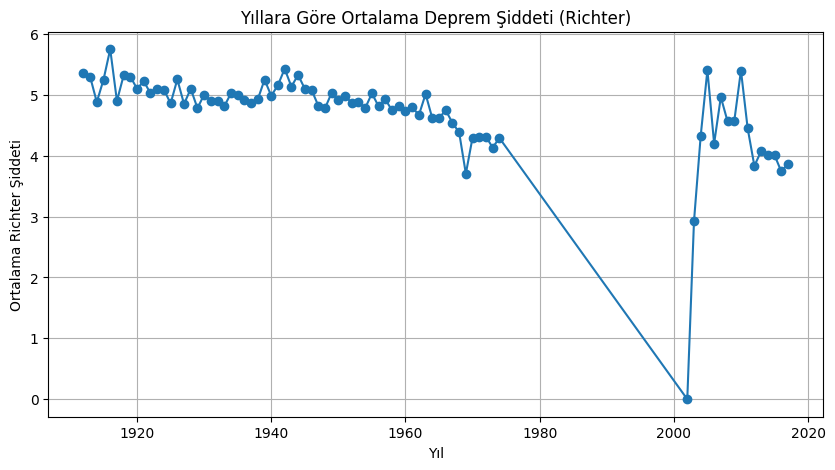

In [ ]:
import matplotlib.pyplot as plt

data_cleaned['year'] = data_cleaned['datetime'].dt.year


yearly_avg_richter = data_cleaned.groupby('year')['richter'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_richter.index, yearly_avg_richter.values, marker='o', linestyle='-')
plt.title('Yıllara Göre Ortalama Deprem Şiddeti (Richter)')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Richter Şiddeti')
plt.grid(True)
plt.show()


<ipython-input-20-dbc73fe6f5e8>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


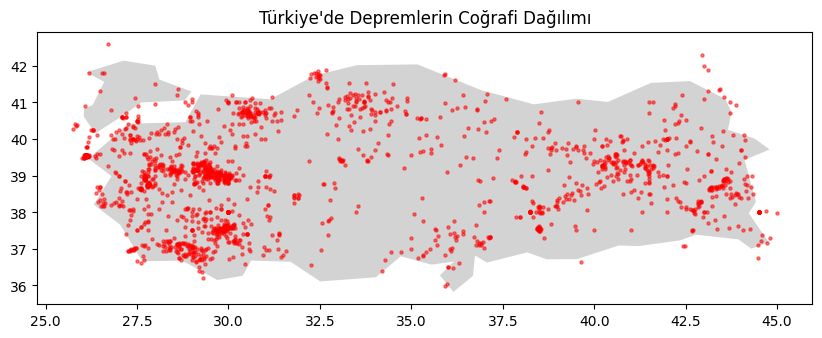

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


geometry = [Point(xy) for xy in zip(data_cleaned['long'], data_cleaned['lat'])]
geo_df = gpd.GeoDataFrame(data_cleaned, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
turkey = world[world.name == 'Turkey']

fig, ax = plt.subplots(figsize=(10, 10))
turkey.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=5, color='red', alpha=0.5, marker='o')
plt.title('Türkiye\'de Depremlerin Coğrafi Dağılımı')
plt.show()


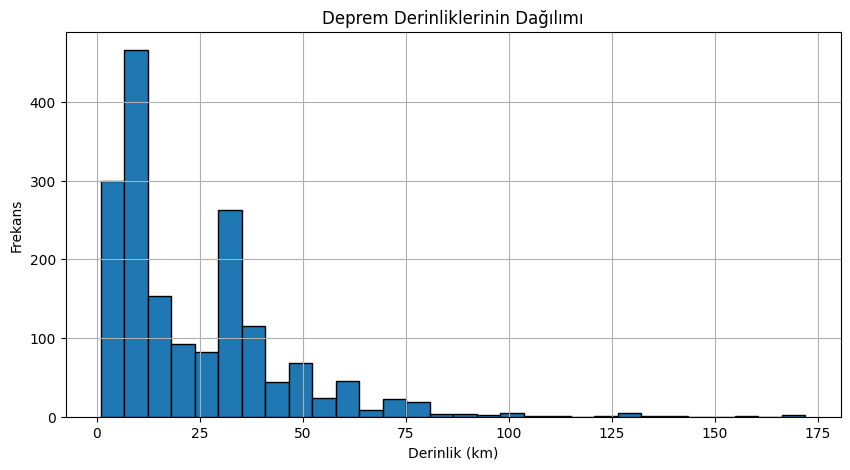

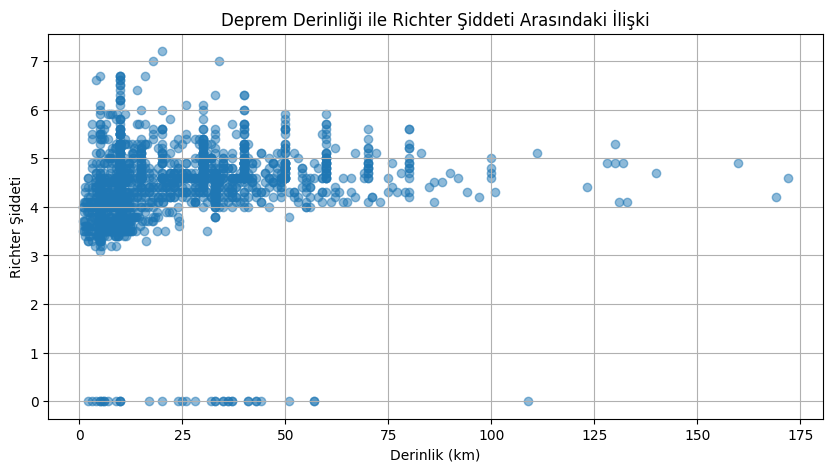

In [ ]:

plt.figure(figsize=(10, 5))
plt.hist(data_cleaned['depth'], bins=30, edgecolor='black')
plt.title('Deprem Derinliklerinin Dağılımı')
plt.xlabel('Derinlik (km)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data_cleaned['depth'], data_cleaned['richter'], alpha=0.5)
plt.title('Deprem Derinliği ile Richter Şiddeti Arasındaki İlişki')
plt.xlabel('Derinlik (km)')
plt.ylabel('Richter Şiddeti')
plt.grid(True)
plt.show()


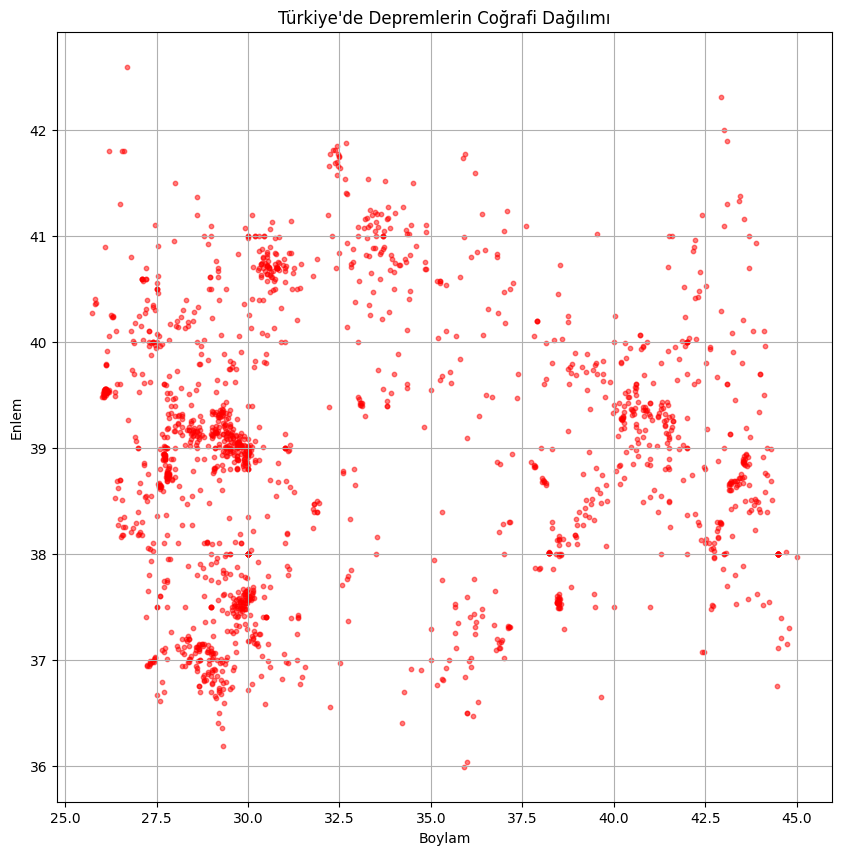

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data_cleaned['long'], data_cleaned['lat'], alpha=0.5, c='red', s=10)
plt.title('Türkiye\'de Depremlerin Coğrafi Dağılımı')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.grid(True)
plt.show()


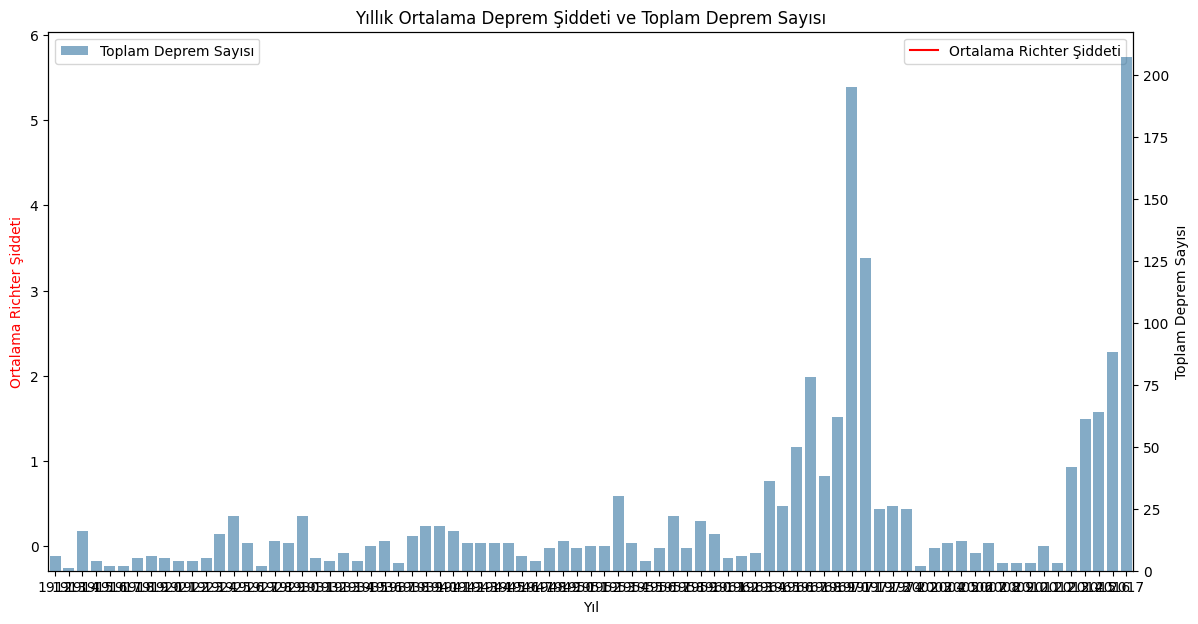

In [ ]:
import seaborn as sns

yearly_data = data_cleaned.groupby('year').agg({'richter': ['mean', 'count']}).reset_index()
yearly_data.columns = ['year', 'avg_richter', 'count']

fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
sns.lineplot(data=yearly_data, x='year', y='avg_richter', ax=ax1, color='r', label='Ortalama Richter Şiddeti')
sns.barplot(data=yearly_data, x='year', y='count', ax=ax2, alpha=0.6, label='Toplam Deprem Sayısı')

ax1.set_xlabel('Yıl')
ax1.set_ylabel('Ortalama Richter Şiddeti', color='r')
ax2.set_ylabel('Toplam Deprem Sayısı')
plt.title('Yıllık Ortalama Deprem Şiddeti ve Toplam Deprem Sayısı')
plt.legend()
plt.show()


<ipython-input-24-4361f6ea99c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


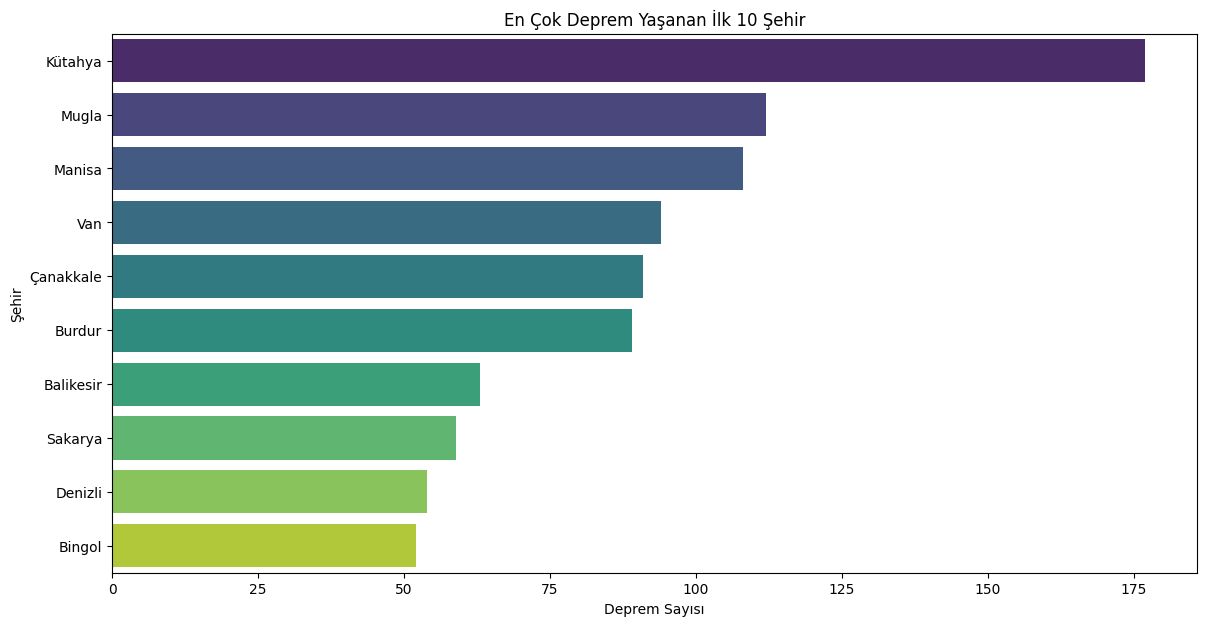

In [ ]:

top_cities = data_cleaned['city'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('En Çok Deprem Yaşanan İlk 10 Şehir')
plt.xlabel('Deprem Sayısı')
plt.ylabel('Şehir')
plt.show()


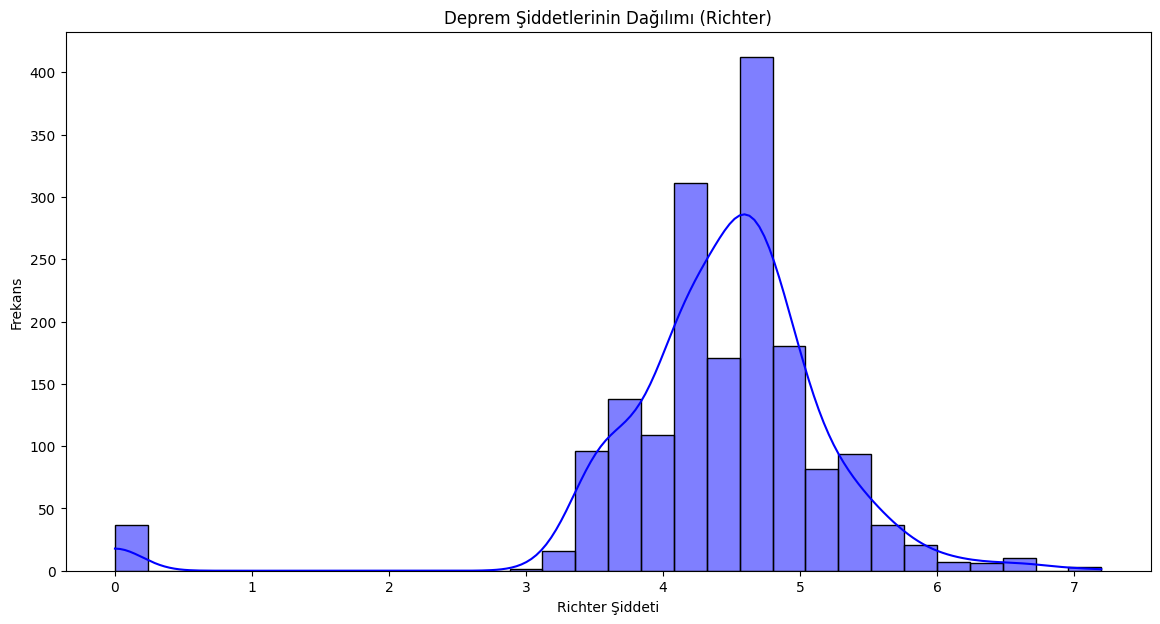

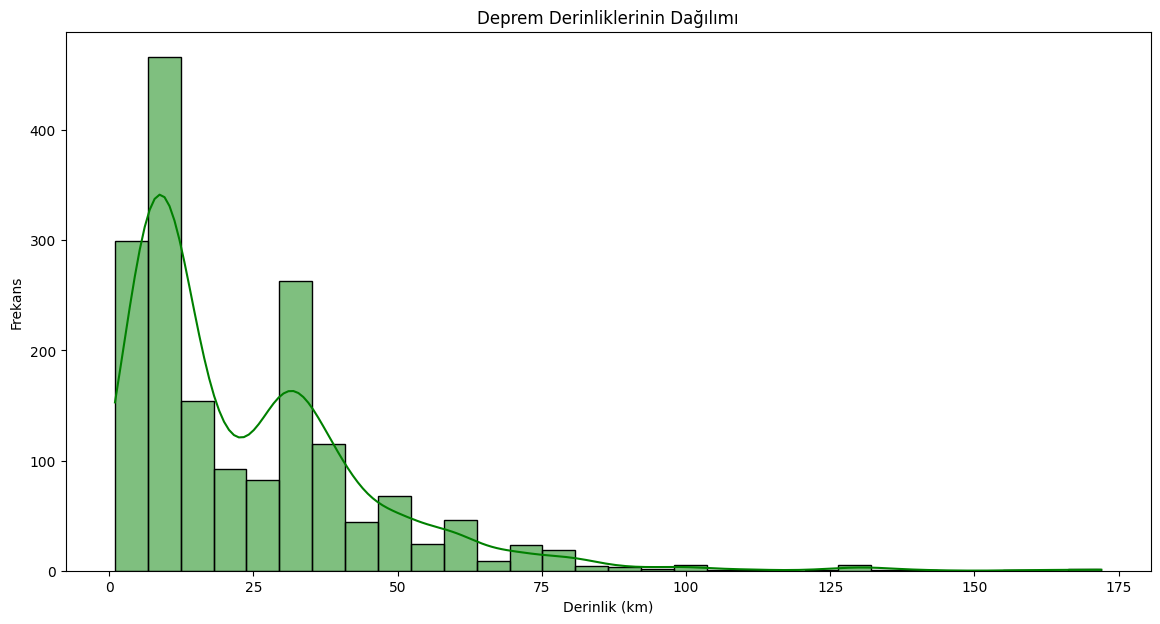

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(data_cleaned['richter'], bins=30, kde=True, color='blue')
plt.title('Deprem Şiddetlerinin Dağılımı (Richter)')
plt.xlabel('Richter Şiddeti')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(data_cleaned['depth'], bins=30, kde=True, color='green')
plt.title('Deprem Derinliklerinin Dağılımı')
plt.xlabel('Derinlik (km)')
plt.ylabel('Frekans')
plt.show()


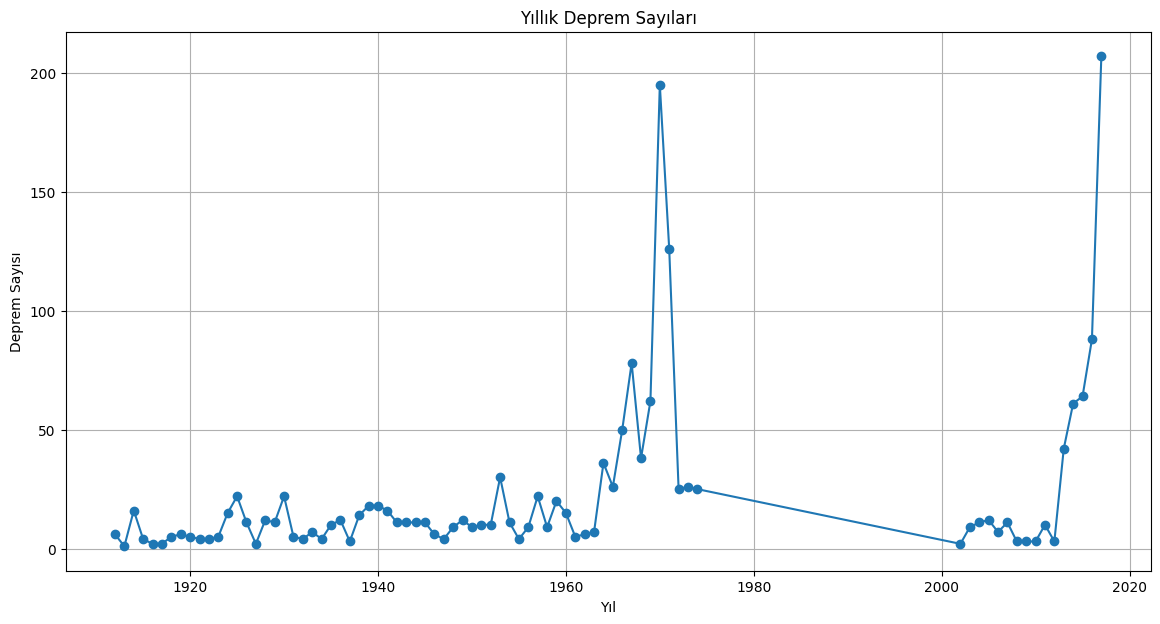

In [ ]:
# Yıllık deprem sayıları
yearly_count = data_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
yearly_count.plot(kind='line', marker='o')
plt.title('Yıllık Deprem Sayıları')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


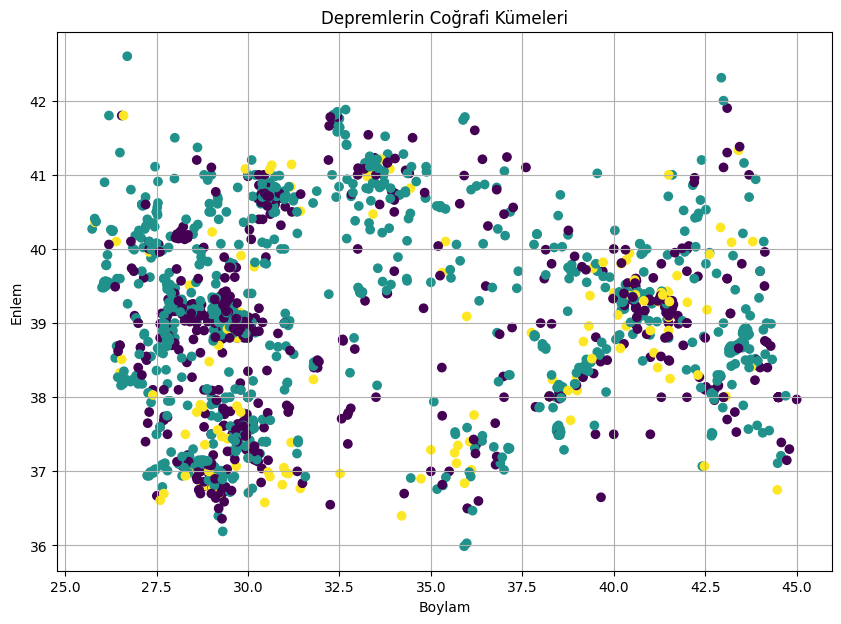

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Özellikleri seçme
features = data_cleaned[['lat', 'long', 'depth']]

# Küme sayısını belirleme (örneğin 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Küme etiketlerini veriye ekleme
data_cleaned['cluster'] = kmeans.labels_

# Kümeleri görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(data_cleaned['long'], data_cleaned['lat'], c=data_cleaned['cluster'], cmap='viridis')
plt.title('Depremlerin Coğrafi Kümeleri')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

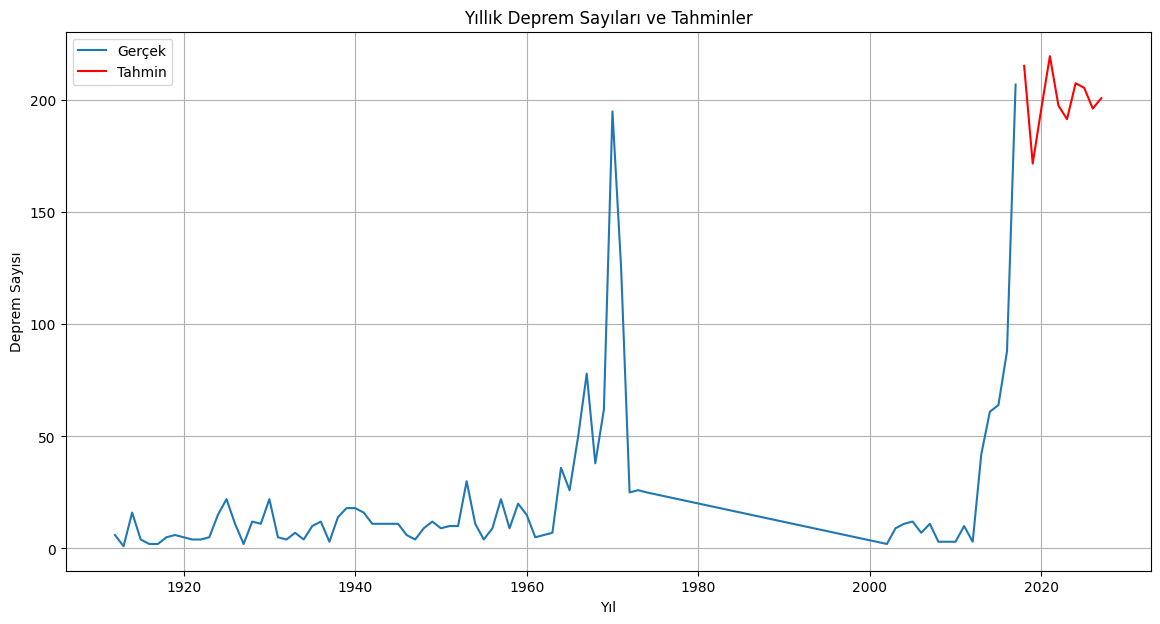

In [ ]:
# Yıllık deprem sayıları serisini zaman serisi veri kümesi olarak ayarlama
yearly_count = yearly_count.sort_index()
yearly_count.index = pd.to_datetime(yearly_count.index, format='%Y')

# ARIMA modeli oluşturma ve tahmin yapma
model = ARIMA(yearly_count, order=(5, 1, 0))
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=yearly_count.index[-1], periods=10, freq='Y')

# Sonuçları görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(yearly_count.index, yearly_count.values, label='Gerçek')
plt.plot(forecast_index, forecast, label='Tahmin', color='red')
plt.title('Yıllık Deprem Sayıları ve Tahminler')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.legend()
plt.grid(True)
plt.show()

